## Amirreza Hosseini
**9820363**

Introduction to Data Mining
HomeWork 3 <br>
Q6

In [1]:
import pandas as pd

1-read the csv file and store it in a dataframe and show the Data frame info

In [2]:
bank = pd.read_csv('./BankNote.csv')
bank.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [3]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [4]:
bank.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [5]:
bank.isnull().count()

variance    1372
skewness    1372
curtosis    1372
entropy     1372
class       1372
dtype: int64

reduce features to 2 with PCA method

In [6]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(bank)
principalComponents= pca.transform(bank)
new_bank= pd.DataFrame(data = principalComponents, columns = ['new f1', 'new f2'])
new_bank

,new f1,new f2
0,-8.128638,-2.390167
1,-7.811304,-2.712167
2,3.674734,-4.399368
3,-9.917815,-0.989089
4,6.942445,-0.772452
...,...,...
1367,-0.988750,-1.198333
1368,8.795215,0.528851
1369,21.734566,4.807556
1370,14.956474,3.804900


2- plot the dendogram with ward,single,complete method

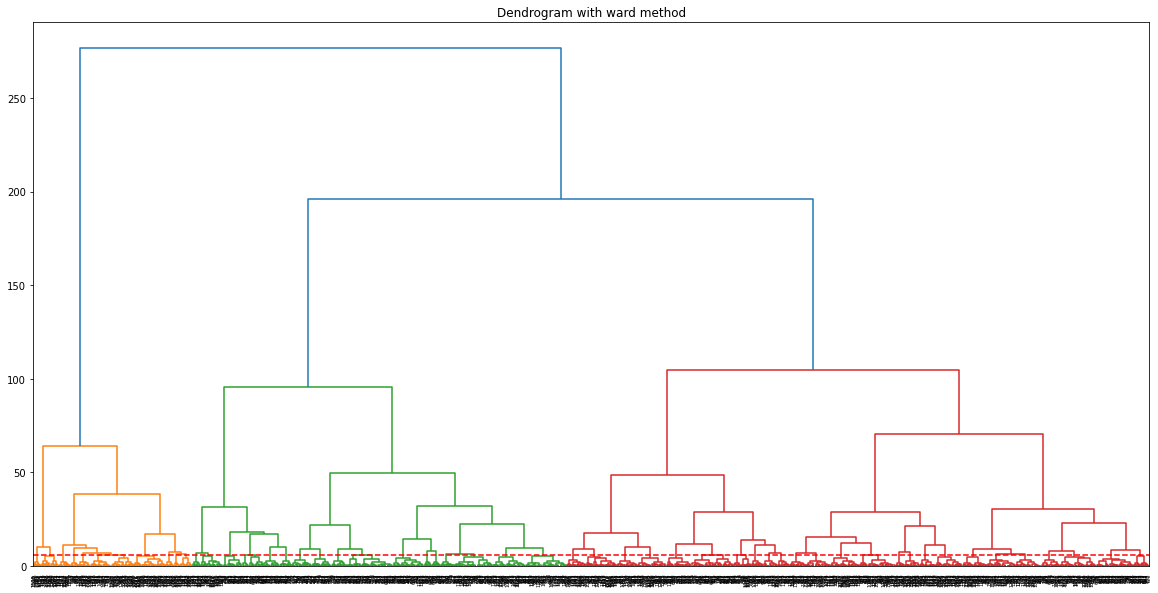

In [7]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
plt.title("Dendrogram with ward method")
dend = dendrogram(linkage(new_bank, method='ward'))
plt.axhline(y=6, color='r', linestyle='--')
plt.show()

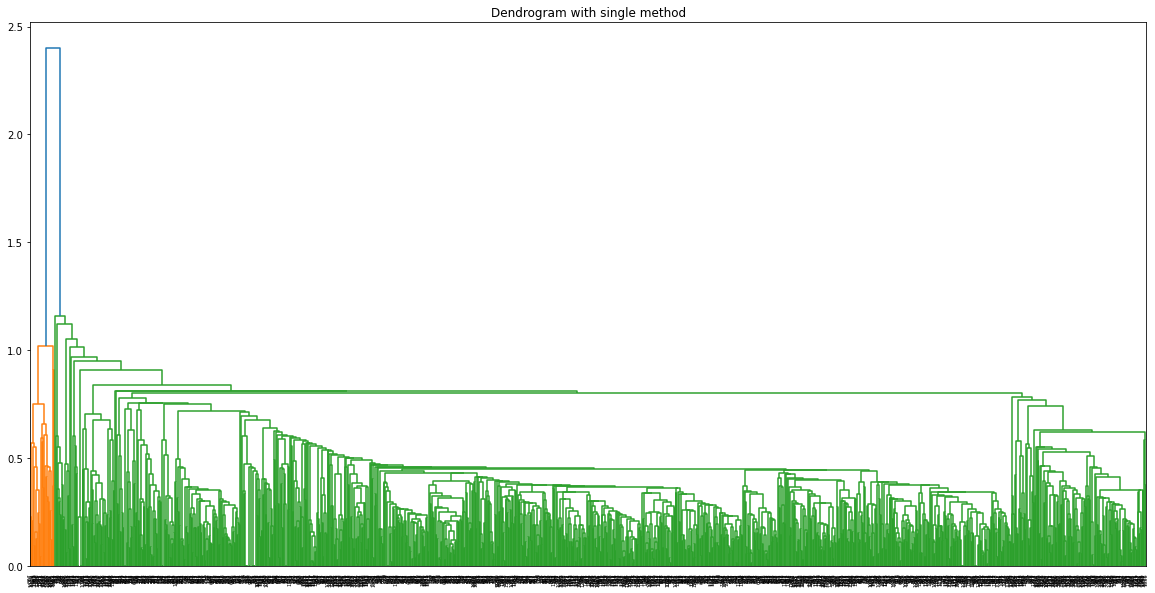

In [8]:
#plot the dendogram with single method
plt.figure(figsize=(20, 10))
plt.title("Dendrogram with single method")
dend = dendrogram(linkage(new_bank, method='single'))
plt.axhline(y=6, color='r', linestyle='--')
plt.show()

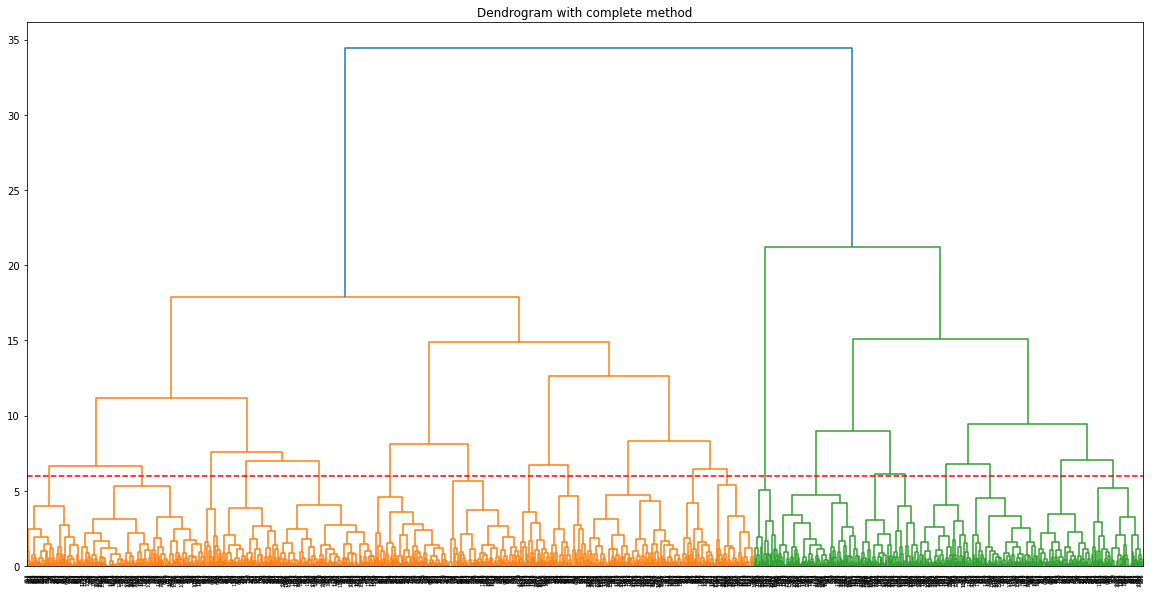

In [9]:
#plot the dendogram with complete method
plt.figure(figsize=(20, 10))
plt.title("Dendrogram with complete method")
dend = dendrogram(linkage(new_bank, method='complete'))
plt.axhline(y=6, color='r', linestyle='--')
plt.show()

3-AgglomerativeClustering the data using agglomerative clustering with sihlouette score and plot the result

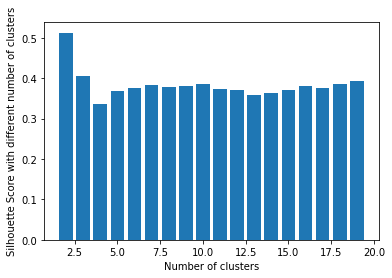

In [10]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import numpy as np
silhouette_scores = []

for n_cluster in range(2, 20):
    silhouette_scores.append(silhouette_score(new_bank, AgglomerativeClustering(n_clusters=n_cluster).fit_predict(new_bank)))
    
#bar plot of the result
plt.bar(np.arange(2, 20), silhouette_scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score with different number of clusters')
plt.show()

In [11]:
#print the best number of clusters
print("The best number of clusters is: ", silhouette_scores.index(max(silhouette_scores))+2)

The best number of clusters is:  2


4-scatter plot of the best result (k=2)

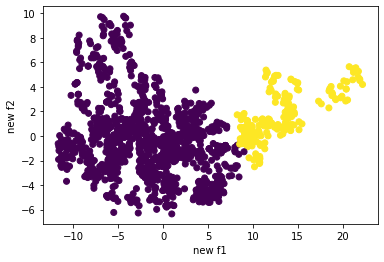

In [12]:
plt.scatter(new_bank['new f1'], new_bank['new f2'], c=AgglomerativeClustering(n_clusters=2).fit_predict(new_bank))
plt.xlabel('new f1')
plt.ylabel('new f2')
plt.show()

5-describe each of the clusters for K=2

In [13]:
#describe each of the clusters for K=2
new_bank['cluster']=AgglomerativeClustering(n_clusters=2).fit_predict(new_bank)
new_bank.groupby('cluster').describe()

new f1                                                       \
          count       mean       std        min       25%        50%   
cluster                                                                
0        1176.0  -2.140191  4.896093 -11.695889 -5.928805  -2.291677   
1         196.0  12.841145  3.626954   8.257116  9.853303  11.985752   

                               new f2                                          \
               75%        max   count      mean       std       min       25%   
cluster                                                                         
0         1.453790   9.021863  1176.0 -0.258263  3.133093 -6.347220 -2.343014   
1        14.226114  22.228621   196.0  1.549579  1.916749 -2.506183  0.173509   

                                       
              50%       75%       max  
cluster                                
0       -0.626498  1.204141  9.750897  
1        1.130049  3.120952  5.642637

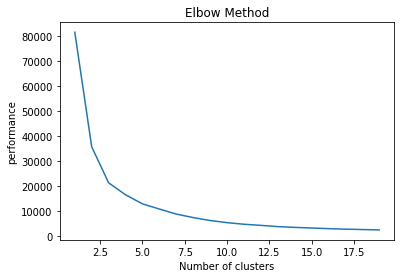

In [14]:
#do the same clustering in part 3 with elbow method and inertia
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(new_bank)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 20), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('performance')
plt.show()

In [15]:
#print the best number of clusters
print("The best number of clusters is: ", 3)

The best number of clusters is:  3


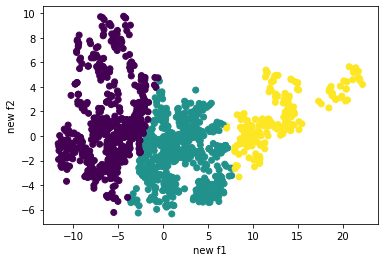

In [16]:
plt.scatter(new_bank['new f1'], new_bank['new f2'], c=KMeans(n_clusters=3).fit_predict(new_bank))
plt.xlabel('new f1')
plt.ylabel('new f2')
plt.show()

In [17]:
#describe each of the clusters for K=3
new_bank['cluster']=KMeans(n_clusters=3).fit_predict(new_bank)
new_bank.groupby('cluster').describe()

new f1                                                       \
         count       mean       std        min       25%        50%   
cluster                                                               
0        209.0  12.543869  3.699577   7.083271  9.573247  11.699594   
1        598.0  -6.158448  2.596565 -11.695889 -7.992220  -5.884735   
2        565.0   1.878024  2.665574  -3.668598 -0.205195   1.424919   

                              new f2                                          \
               75%        max  count      mean       std       min       25%   
cluster                                                                        
0        14.036887  22.228621  209.0  1.369355  2.004652 -3.335049  0.058275   
1        -4.203268  -0.560527  598.0  1.026389  3.273631 -6.227328 -1.214689   
2         4.022106   7.673678  565.0 -1.592878  2.348402 -6.347220 -3.725371   

                                       
              50%       75%       max  
cluster                                
0        0.954504  2.961673  5.642637  
1        0.332006  2.644613  9.750897  
2       -1.517943  0.090925  4.467670

6- kelbow_visualizer for AgglomerativeClustering and K-means model

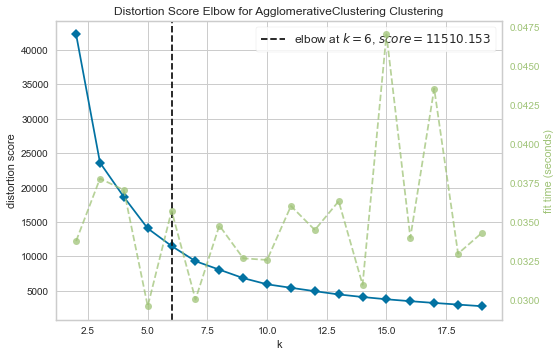

<AxesSubplot:title={'center':'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [18]:
from yellowbrick.cluster import KElbowVisualizer
model = AgglomerativeClustering()
visualizer = KElbowVisualizer(model, k=(2,20))
visualizer.fit(new_bank)
visualizer.show()

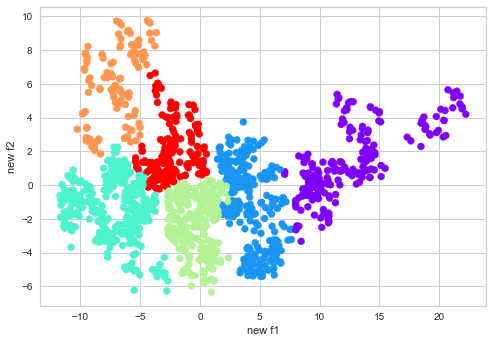

In [19]:
#clustering with best elbow k=6 
plt.scatter (new_bank['new f1'], new_bank['new f2'], c=AgglomerativeClustering(n_clusters=6).fit_predict(new_bank), cmap='rainbow')
plt.xlabel('new f1')
plt.ylabel('new f2')
plt.show()

Do the same for K-means

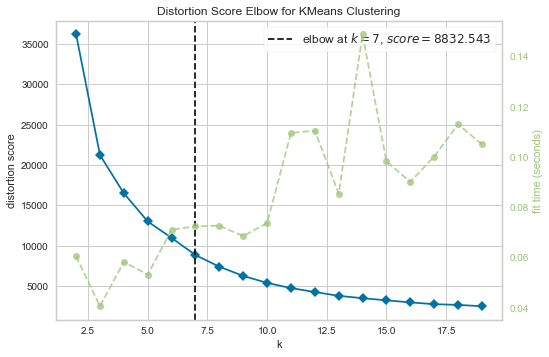

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [20]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,20))
visualizer.fit(new_bank)
visualizer.show()

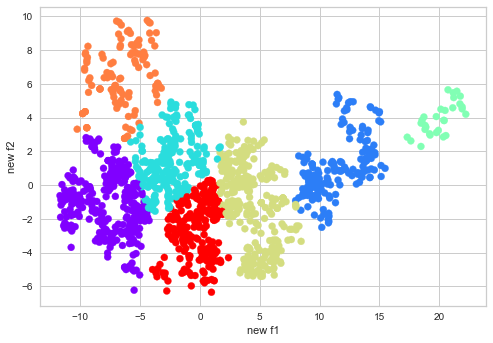

In [21]:
plt.scatter (new_bank['new f1'], new_bank['new f2'], c=KMeans(n_clusters=7).fit_predict(new_bank), cmap='rainbow')
plt.xlabel('new f1')
plt.ylabel('new f2')
plt.show()

7- interia score for k in range(1,5) in Kmeans and scatter plot

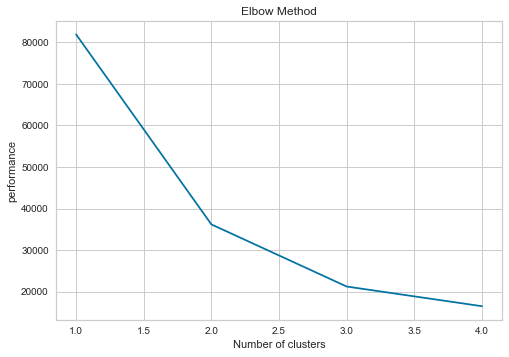

In [22]:

wcss = []
for i in range(1, 5):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(new_bank)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 5), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('performance')
plt.show()

best number of clusters is 2

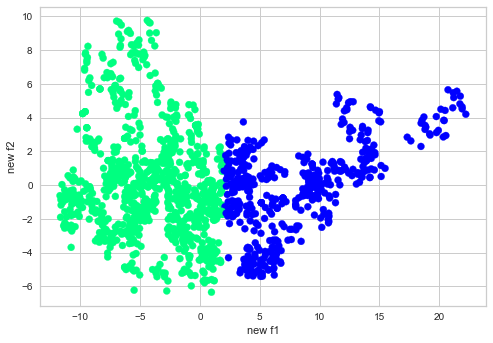

In [23]:
plt.scatter (new_bank['new f1'], new_bank['new f2'], c=KMeans(n_clusters=2).fit_predict(new_bank), cmap='winter')
plt.xlabel('new f1')
plt.ylabel('new f2')
plt.show()

8-normalize the Bank dataset with TSNE method

In [24]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)
tsne_obj= tsne.fit_transform(bank)
tsne_bank = pd.DataFrame({'F1':tsne_obj[:,0],
                        'F2':tsne_obj[:,1]})
tsne_bank

c:\Users\Amir\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\Amir\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


,F1,F2
0,37.801228,7.859463
1,35.184048,11.731545
2,-6.623430,5.115595
3,47.051311,-15.278500
4,-19.861940,5.865193
...,...,...
1367,-14.255390,-37.528709
1368,-39.742481,1.297129
1369,-39.645248,32.198338
1370,-48.287182,20.600109


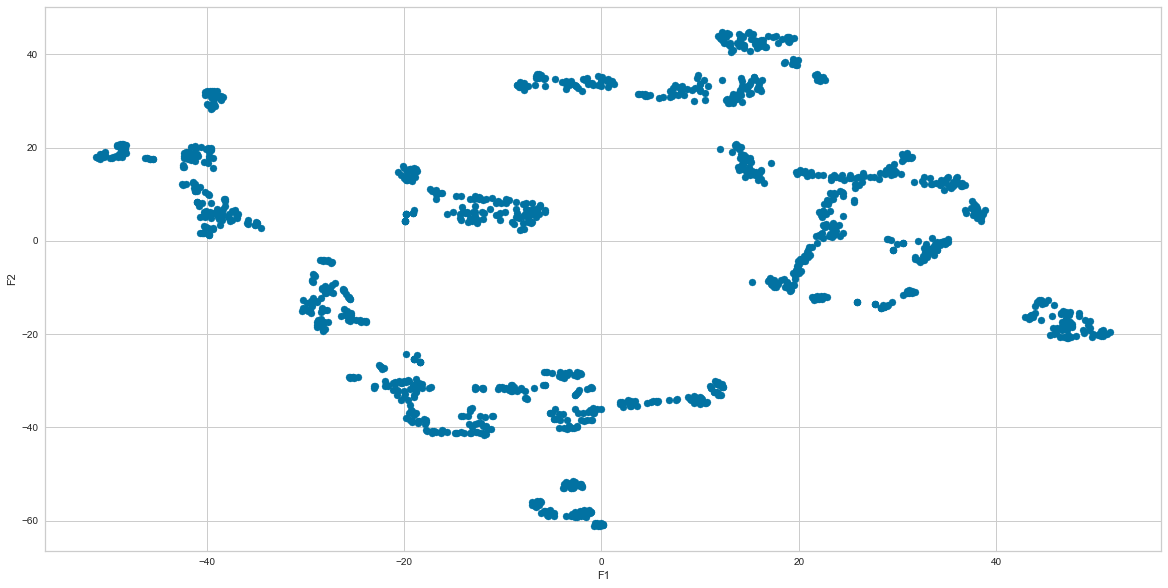

In [25]:
#show the scatter plot of the tsne
plt.figure(figsize=(20, 10))
plt.scatter(tsne_bank['F1'], tsne_bank['F2'], cmap='winter')
plt.xlabel('F1')
plt.ylabel('F2')
plt.show()

9-clustering with DBSCAN find the best eps and min_samples manually

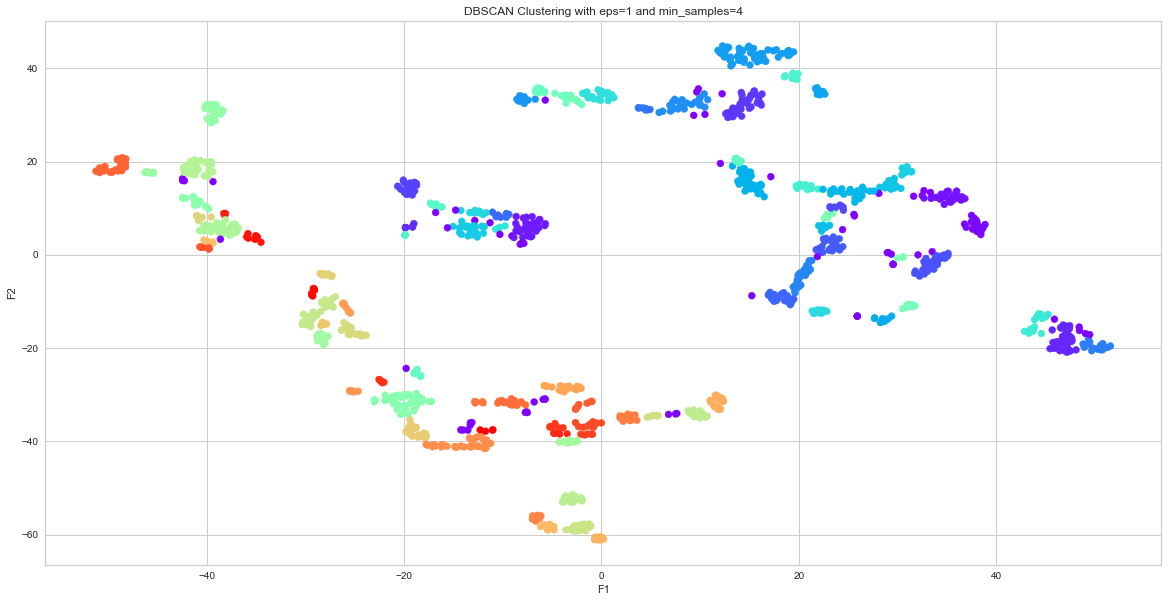

In [26]:
#clustering with DBSCAN
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=1, min_samples=4)
dbscan.fit(tsne_bank)
plt.figure(figsize=(20, 10))
plt.scatter(tsne_bank['F1'], tsne_bank['F2'], c=dbscan.labels_, cmap='rainbow')
plt.xlabel('F1')
plt.ylabel('F2')
plt.title('DBSCAN Clustering with eps=1 and min_samples=4')
plt.show()

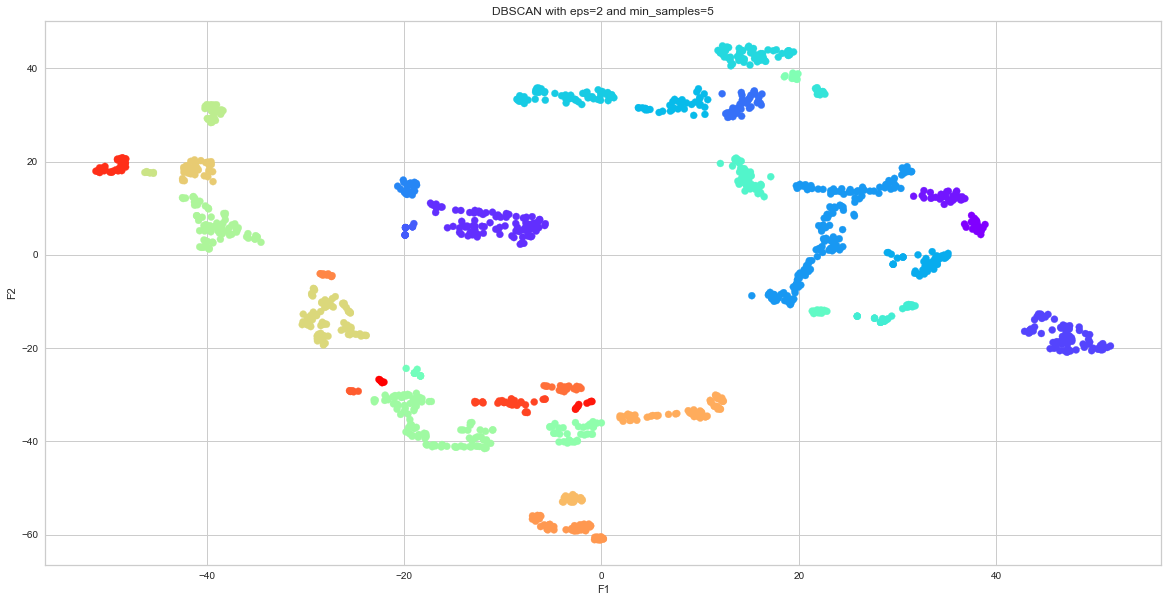

In [27]:
dbscan = DBSCAN(eps=2, min_samples=5)
dbscan.fit(tsne_bank)
plt.figure(figsize=(20, 10))
plt.scatter(tsne_bank['F1'], tsne_bank['F2'], c=dbscan.labels_, cmap='rainbow')
plt.xlabel('F1')
plt.ylabel('F2')
plt.title('DBSCAN with eps=2 and min_samples=5')
plt.show()

As we can see, the number of eps and min_sample have a huge impact of the result of data clustering.
so we could initialize them randomly or have KNN to find them efficiently.
but as we see for previous clustering, the number of noise points will reduce if we increase the number of eps and min_sample

10-find the best eps and min_samples for DBSCAN with nearest neighbors

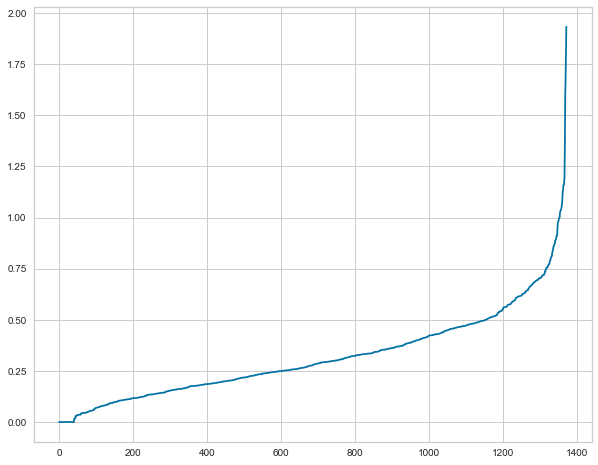

In [28]:
from sklearn.neighbors import NearestNeighbors
nn = NearestNeighbors(n_neighbors=20).fit(tsne_bank)
distances, indices = nn.kneighbors(tsne_bank)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(10,8))
plt.plot(distances)

Lets consider eps range 0.45 to 0.75 and _min_sample_ range 10 to 21 and iterate over these combinations and get the best silhouette score.

In [29]:
#The optimal value for epsilon will be found at the point of maximum curvature.
min_samples = range(1,20)
eps = np.arange(0.45,0.75, 0.01) # returns array of ranging from 0.45 to 0.75 with step of 0.01

In [30]:
output = []

#Get the parameters for best silhouette score
for i in min_samples:
    for j in eps:
        dbscan = DBSCAN(eps=j, min_samples=i)
        dbscan.fit(tsne_bank)
        if len(np.unique(dbscan.labels_)) > 1:
            silhouette = silhouette_score(tsne_bank, dbscan.labels_)
            output.append([i, j, silhouette])
        else:
            pass

In [31]:
min_samples, eps, score = sorted(output, key=lambda x:x[-1])[-1]
print(f"Best silhouette_score: {score}")
print(f"min_samples: {min_samples}")
print(f"eps: {eps}")

Best silhouette_score: 0.4659029543399811
min_samples: 2
eps: 0.6900000000000002


In [32]:
#Get the number of clusters and outliers for DBSCAN with best parameters
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
dbscan.fit(tsne_bank)
print("Number of clusters: ", len(np.unique(dbscan.labels_)))
print("Number of outliers: ", np.sum(np.where(dbscan.labels_ == -1, 1,0)))

Number of clusters:  188
Number of outliers:  83


<AxesSubplot:xlabel='F1', ylabel='F2'>

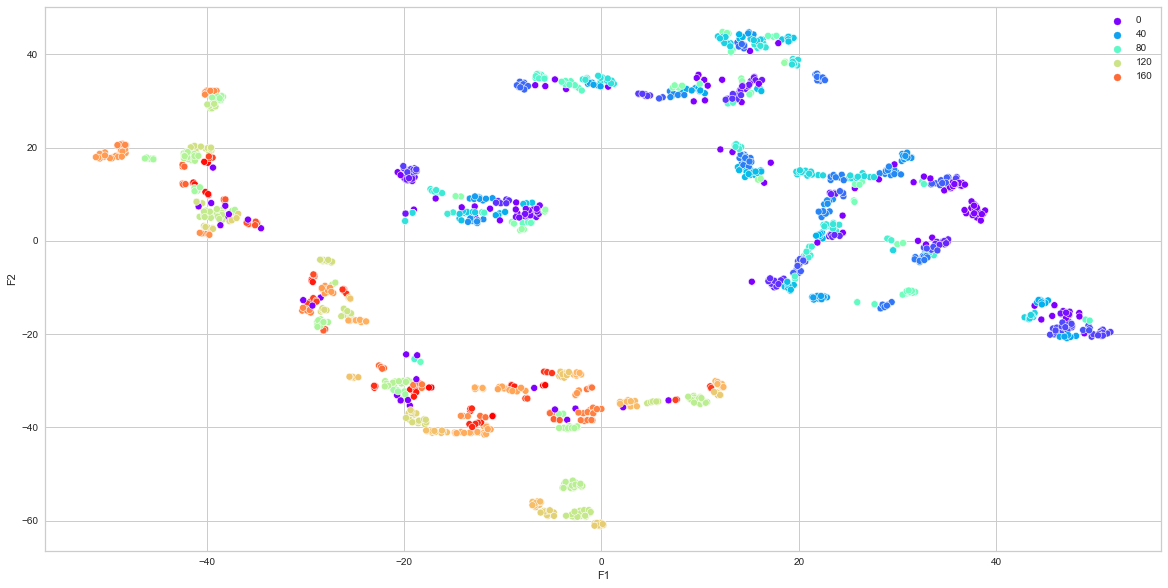

In [33]:
import seaborn as sns
plt.figure(figsize=(20,10))
sns.scatterplot(x=tsne_bank['F1'], y=tsne_bank['F2'], hue=dbscan.labels_, palette='rainbow')